<a href="https://colab.research.google.com/github/TiaraRizkiRahmandhani12/Note_App_react/blob/master/FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Face Detection

In [35]:
import cv2

In [36]:
cv2.__version__

'4.6.0'

In [37]:
img = cv2.imread('Dilan.jpg')

In [38]:
print(img)

[[[ 12  16  69]
  [ 11  15  68]
  [ 11  15  68]
  ...
  [  2  11  49]
  [  5   8  52]
  [  6   9  53]]

 [[ 14  17  72]
  [ 12  15  70]
  [ 12  14  72]
  ...
  [  4  11  50]
  [  5   9  50]
  [  4   8  49]]

 [[ 15  18  73]
  [ 14  17  72]
  [ 13  16  71]
  ...
  [  6  10  51]
  [  5   9  50]
  [  4   7  52]]

 ...

 [[ 37  39 117]
  [ 38  41 116]
  [ 37  40 115]
  ...
  [  6  12  59]
  [  6  12  59]
  [  6  12  59]]

 [[ 38  41 115]
  [ 38  41 115]
  [ 39  42 116]
  ...
  [  5   9  58]
  [  7  11  60]
  [  7  12  61]]

 [[ 40  42 113]
  [ 40  42 113]
  [ 40  45 114]
  ...
  [  6  11  60]
  [  7  13  60]
  [  8  14  61]]]


In [39]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [40]:
haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [41]:
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

In [42]:
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 9)

In [43]:
for (x,y,w,h) in faces_rect: 
   # Menggambar persegi pada wajah
   cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
   cv2.putText(img, "Face", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
   roi_gray = gray[y:y+h, x:x+w]
   roi_color = img[y:y+h, x:x+w]
 
   # mendeteksi senyum pada ROI wajah
   smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
   if len(smiles) > 0:
      print("smile detected")
      for (sx, sy, sw, sh) in smiles:
         cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2)
         cv2.putText(roi_color, "smile", (sx, sy),
         cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
   else:
      print("smile not detected")


smile detected


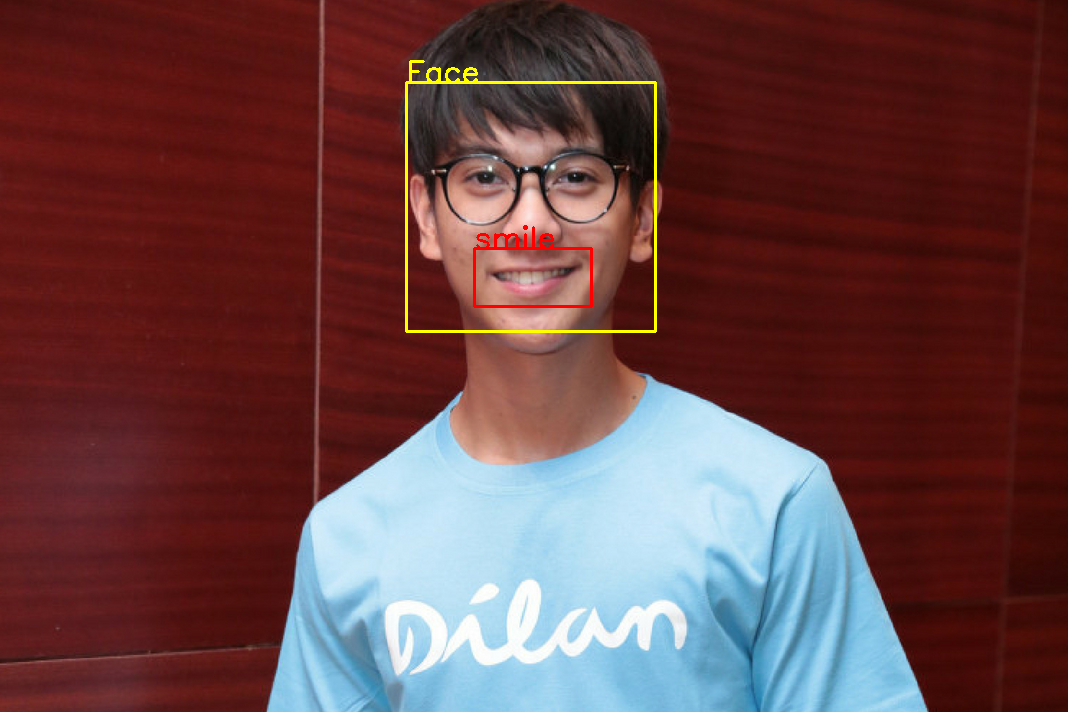

In [44]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()